#Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

#DataSet


In [2]:
df = datasets.load_iris()
X = df.data
y = df.target

X.shape, y.shape

((150, 4), (150,))

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=40)
X_train.shape

(105, 4)

In [4]:
print(X_test[0,:], y_test[0])

[4.4 3.  1.3 0.2] 0


In [5]:
dist = np.unique(y_train, return_counts=True)
dist
#Portanto os labels estão igualmente distribuidos

(array([0, 1, 2]), array([34, 36, 35]))

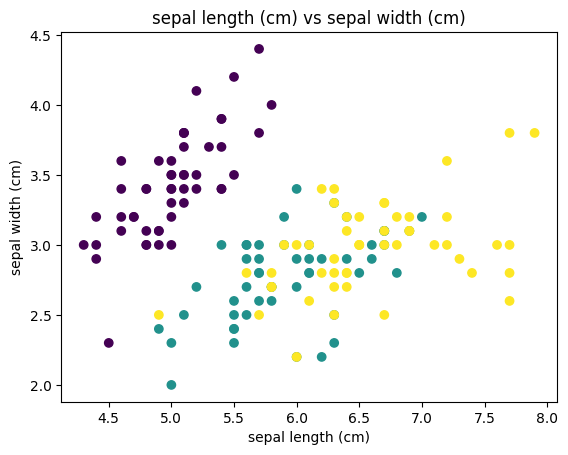

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title(df.feature_names[0] + ' vs ' + df.feature_names[1])
plt.xlabel(df.feature_names[0])
plt.ylabel(df.feature_names[1])
plt.show()

#Classe MLP

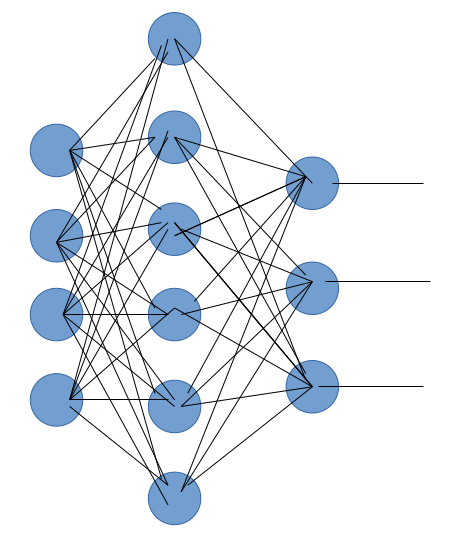

In [7]:
class MLP:
  np.random.seed(30)
  def __init__(self, X: np.ndarray, y: np.ndarray, hidden_neurons: int = 6,output_neurons: int = 3):
    self.X = X
    self.y = y
    self.hidden_neurons = hidden_neurons
    self.output_neurons = output_neurons
    self.input_neurons = X.shape[1]

    #Pesos e bias
    self.w1 = np.random.randn(self.input_neurons,self.hidden_neurons)
    self.b1 = np.zeros((1,self.hidden_neurons))

    self.w2 = np.random.randn(self.hidden_neurons,self.output_neurons)
    self.b2 = np.zeros((1,self.output_neurons))

    self.z1 = 0
    self.f1 = 0



  def feedForward(self, X: np.ndarray):
    self.z1 = np.dot(X,self.w1) + self.b1
    self.f1 = np.tanh(self.z1)

    z2 = np.dot(self.f1,self.w2) + self.b2

    ##Softmax
    exp_values = np.exp(z2)
    softmax = exp_values/ np.sum(exp_values, axis = 1, keepdims=True)

    return softmax

  def loss(self, softmax):
    for i, correct_index in enumerate(self.y):
      predicted = softmax[i][correct_index]


    log_prob = -y*np.log(predicted)
    return log_prob / self.y.shape[0]


  def backPropagation(self,softmax: np.ndarray, learning_rate: float):
    delta2 = np.copy(softmax)
    delta2[range(self.X.shape[0]),self.y] -= 1

    dw2 = np.dot(self.f1.T,delta2)
    db2 = np.sum(delta2,axis=0,keepdims=True)

    delta1 = (delta2@self.w2.T) * (1 - np.power(np.tanh(self.z1),2))
    dw1 = np.dot(self.X.T,delta1)
    db1 = np.sum(delta1,axis = 0, keepdims=True)


    #Update

    self.w1 = self.w1 - learning_rate*dw1
    self.b1 = self.b1 - learning_rate*db1
    self.w2 = self.w2 - learning_rate*dw2
    self.b2 = self.b2 - learning_rate*db2

  def fit(self,epochs : int, learning_rate: float):

    for i in range(epochs):
      outputs = self.feedForward(self.X)
      loss = self.loss(outputs)
      self.backPropagation(outputs,learning_rate)


      prediction = np.argmax(outputs, axis = 1)
      correct = (prediction ==self.y).sum()



    accuracy = correct/ self.y.shape[0]
    print(f'Acurácia :{accuracy}')




In [8]:
epoch = 10000
learning_reating = 0.0001
model = MLP(X_train,y_train)
model.fit(epoch,learning_reating)

Acurácia :0.9714285714285714


In [9]:
predictions = np.argmax(model.feedForward(X_test),axis=1)

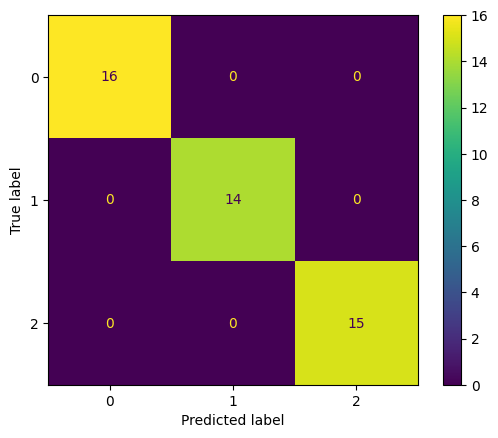

In [10]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

#Salvando o modelo

In [11]:
with open("drive/MyDrive/Algoritmos-AM-e-RN/RedeNeurais/Modelos/modeloIris.pkl", "wb") as arquivo:
	pickle.dump(model, arquivo)

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Algoritmos-AM-e-RN/RedeNeurais/Modelos/modeloIris.pkl'

#Carregando o modelo

In [ ]:
with open("drive/MyDrive/Algoritmos-AM-e-RN/RedeNeurais/Modelos/modeloIris.pkl", "rb") as arquivo:
  modeloIris = pickle.load(arquivo)

In [ ]:
print(np.argmax(modeloIris.feedForward(np.array([4.4, 3,  1.3 ,0.2])),axis= 1))